<a href="https://colab.research.google.com/github/viboo27/ML/blob/main/Building_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing numpy library
import numpy as np

**Linear Regression**

In [ ]:
class Linear_Regression():
# initiating the parameter (learning_rate and no_of_itertions)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # no of training examples & numbers of features

    self.m,self.n = X.shape   # no of rows and columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight( self ):
    Y_prediction = self.predict(self.X)

    # calculate gradient

    dw = - ( 2 * (self.X.T).dot(self.Y - Y_prediction) )/self.m
    db = -2 * np.sum(self.Y - Y_prediction)/self.m

    # updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w) + self.b

            

In [ ]:
# importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


**Data Preprocessing**


In [ ]:
# loading data from csv file to pandas dataframe
salary_data = pd.read_csv('/content/Salary_Data.csv')



In [ ]:
# printing first five data
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# printing last five data

salary_data.tail()


,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
# print the number of row and column
salary_data.shape

(30, 2)

In [ ]:
# checking the missing value
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Spliting feature and target**

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


**Spliting the dataset into training and test dataset**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Training the Linear Regression Model

In [ ]:
model = Linear_Regression(learning_rate = 0.02,no_of_iterations=1000)


In [ ]:
model.fit(X_train,Y_train)

In [ ]:
# printing the parameter values (weight and bias)

print('weight = ',  model.w[0] )
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the Test Values

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visusalising the predicted value and actual value

Text(0.5, 1.0, 'salary vs experience')

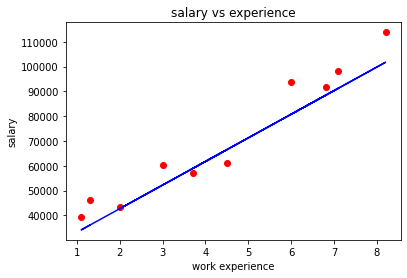

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience')